In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [9]:
#Getting a CSV file path and store into a variable "url"
url = "C://Users/juan_/Downloads/FuelConsumptionCo2.csv"

In [4]:
url

'file://C:/Users/juan_/Downloads/FuelConsumptionCo2.csv'

In [10]:
#Reading a CSV file into a Pandas DataFrame
df = pd.read_csv(url)

In [11]:
#Reading the five first rows
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [13]:
#Reading Statistical informations of DF
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [15]:
#Creating a new dataframe with our targets attributes 
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [18]:
#Storing the attributes into a variable
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

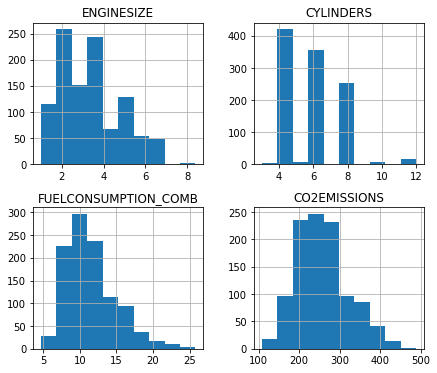

In [31]:
#Overview Visualization
viz.hist(figsize=(7,6))
plt.show()

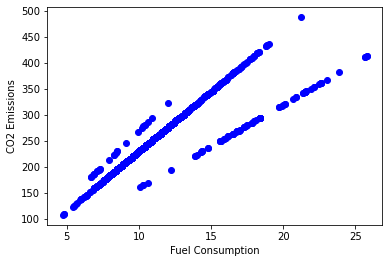

In [38]:
#Plotting Fuel Consumption x CO2 Emissions
plt.scatter(cdf['FUELCONSUMPTION_COMB'],cdf['CO2EMISSIONS'], color='blue')
plt.xlabel('Fuel Consumption')
plt.ylabel('CO2 Emissions')
plt.show()

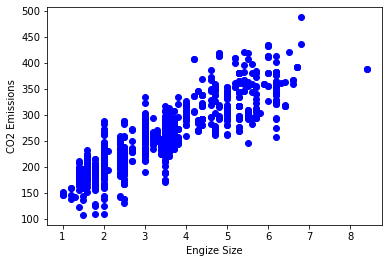

In [42]:
#Plotting Engine Size x CO2 Emissions
plt.scatter(cdf['ENGINESIZE'],cdf['CO2EMISSIONS'], color='blue')
plt.xlabel('Engize Size')
plt.ylabel('CO2 Emissions')
plt.show()

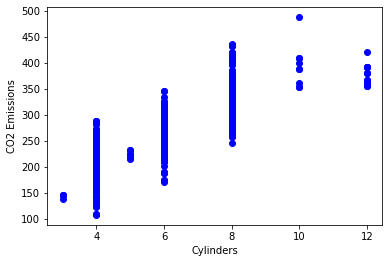

In [41]:
#Plotting Cylinders x CO2 Emissions
plt.scatter(cdf['CYLINDERS'],cdf['CO2EMISSIONS'], color='blue')
plt.xlabel('Cylinders')
plt.ylabel('CO2 Emissions')
plt.show()

In [48]:
#Storing the independent variable (Engine Size) and dependent/predicted variable (CO2EMISSIONS) to X and Y respectively
from sklearn import linear_model
from sklearn.model_selection import train_test_split
X = cdf[['ENGINESIZE']]
y = cdf[['CO2EMISSIONS']]

In [163]:
#Instantiating a linear regression into lr and creating a train-test split
lr = linear_model.LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42) 

In [165]:
#Fitting the data
lr.fit(X,y)

#Yhat is the predicted values of CO2EMISSIONS based on ENGINESIZES values
Yhat_train = lr.predict(X_train)
Yhat_test = lr.predict(X_test)

In [166]:
print('Coefficients:',lr.coef_)
print('Intercept:', lr.intercept_)
print('Train R² score:',lr.score(X_train,y_train))
print('Test R² score:',lr.score(X_test,y_test))

Coefficients: [[39.12519979]]
Intercept: [125.3040995]
Train R² score: 0.7256090062465828
Test R² score: 0.7640901321789726


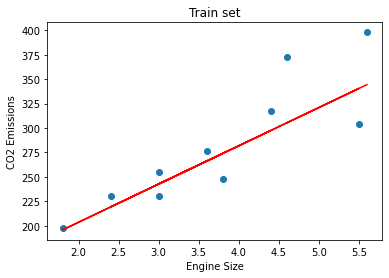

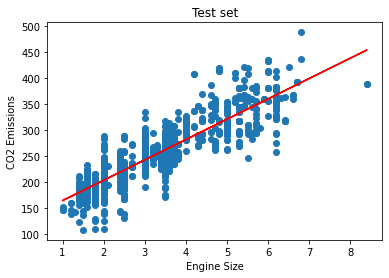

In [167]:
#This is our train values
plt.scatter(X_train,y_train)

#This is our prediction model
plt.plot(X_train,Yhat_train, color='red')

#Giving a labels to axes
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Train set')
plt.show()

#This is our test values
plt.scatter(X_test,y_test)

#This is our prediction model
plt.plot(X_test,Yhat_test, color='red')

#Giving a labels to axes
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Test set')
plt.show()

In [168]:
#Creating a short dataframe to test the model
dftest = pd.DataFrame({'ENGINESIZE':list([1,2,3,4,5,6,7,8])})
dftest
Xreal = dftest[['ENGINESIZE']]

#Yhatreal is the prediction values
Yhatreal = lr.predict(Xreal)

#Creating a new column with the predicted values
dftest['CO2EMISSIONS']= Yhatreal
dftest

,ENGINESIZE,CO2EMISSIONS
0,1,164.429299
1,2,203.554499
2,3,242.679699
3,4,281.804899
4,5,320.930098
5,6,360.055298
6,7,399.180498
7,8,438.305698


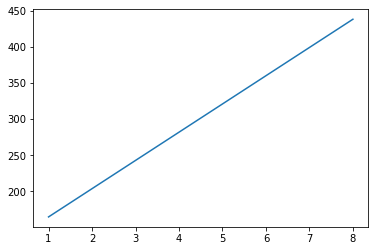

In [169]:
plt.plot(dftest[['ENGINESIZE']],Yhatreal)